# Handling Missing Numerical Data

`Missing values in numerical features` are commonly handled using **univariate imputation**, where each missing
value is replaced with a single statistical measure computed from the same feature.

Univariate imputation is simple, fast, and often effective when the amount of missing data is small.

---

## Types of Univariate Imputation (Numerical Data)

### Mean Imputation

- Replaces missing values with the **average** of the column  
- Best suited for **normally distributed** numerical data  
- Sensitive to outliers  

**When to use:**
- Data is approximately symmetric  
- Outliers are minimal  

---

### Median Imputation

- Replaces missing values with the **middle value** of the column  
- Works well for **skewed distributions**  
- Robust to outliers  

**When to use:**
- Data contains outliers  
- Distribution is skewed  

---

### Most Frequent (Mode) Imputation

- Replaces missing values with the **most common value** in the column  
- Can be applied to numerical or categorical features  
- Useful when a particular value dominates the feature  

**When to use:**
- One value appears very frequently  
- Numerical values represent discrete counts  

---

## Comparison of Numerical Imputation Methods

| Method | Robust to Outliers | Best For |
|------|-------------------|----------|
| Mean | No | Normally distributed data |
| Median | Yes | Skewed data |
| Mode | Partially | Discrete or repetitive values |

---

## Best Practices

- Analyze the data distribution before choosing an imputation method  
- Prefer median imputation when outliers are present  
- Perform imputation **after train-test split** to avoid data leakage  
- Use pipeline-based imputers for consistency and reproducibility  

---

## Summary

Univariate imputation provides a simple and effective way to handle missing numerical data.
Choosing the appropriate statistical measure based on the data distribution helps minimize bias
and improves model reliability.


In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mean-Median Imputation

In [5]:
df = pd.read_csv('Titanic.csv', usecols=['Age','Fare','SibSp','Parch','Survived'])
df['Family'] = df['SibSp'] + df['Parch'] + 1
df

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,2
2,1,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,2
4,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,1
888,0,NaN,1,2,23.4500,4
889,1,26.0,0,0,30.0000,1


In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Family      0.000000
dtype: float64

In [8]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X,y

(      Age  SibSp  Parch     Fare  Family
 0    22.0      1      0   7.2500       2
 1    38.0      1      0  71.2833       2
 2    26.0      0      0   7.9250       1
 3    35.0      1      0  53.1000       2
 4    35.0      0      0   8.0500       1
 ..    ...    ...    ...      ...     ...
 886  27.0      0      0  13.0000       1
 887  19.0      0      0  30.0000       1
 888   NaN      1      2  23.4500       4
 889  26.0      0      0  30.0000       1
 890  32.0      0      0   7.7500       1
 
 [891 rows x 5 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.isnull().mean()

Age       0.196629
SibSp     0.000000
Parch     0.000000
Fare      0.000000
Family    0.000000
dtype: float64

In [15]:
#Using Pandas

mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

In [16]:
X_train.sample(5)

,Age,SibSp,Parch,Fare,Family,Age_mean,Age-median,Age_median
640,20.0,0,0,7.8542,1,20.0,20.0,20.0
577,39.0,1,0,55.9000,2,39.0,39.0,39.0
516,34.0,0,0,10.5000,1,34.0,34.0,34.0
262,52.0,1,1,79.6500,3,52.0,52.0,52.0
763,36.0,1,2,120.0000,4,36.0,36.0,36.0


In [17]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227


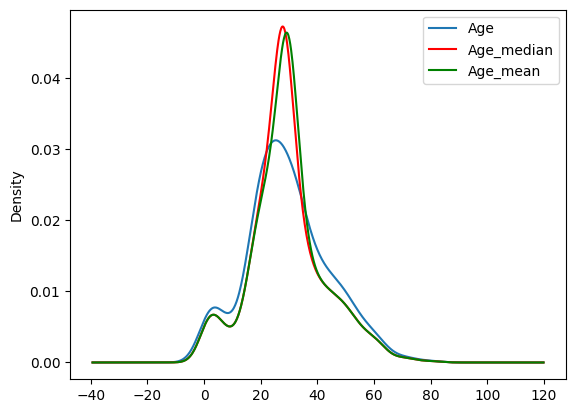

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
X_train.cov()

,Age,SibSp,Parch,Fare,Family,Age_mean,Age-median,Age_median
Age,210.251707,-4.501273,-2.492052,71.580633,-6.993325,210.251707,210.251707,210.251707
SibSp,-4.501273,1.383927,0.410112,9.354652,1.794039,-3.614946,-3.637141,-3.637141
Parch,-2.492052,0.410112,0.626740,9.141094,1.036853,-2.001353,-1.950569,-1.950569
Fare,71.580633,9.354652,9.141094,2700.831981,18.495747,57.485994,61.261919,61.261919
Family,-6.993325,1.794039,1.036853,18.495747,2.830892,-5.616299,-5.587710,-5.587710
Age_mean,210.251707,-3.614946,-2.001353,57.485994,-5.616299,168.851934,168.851934,168.851934
Age-median,210.251707,-3.637141,-1.950569,61.261919,-5.587710,168.851934,169.207310,169.207310
Age_median,210.251707,-3.637141,-1.950569,61.261919,-5.587710,168.851934,169.207310,169.207310


In [20]:
X_train.corr()

,Age,SibSp,Parch,Fare,Family,Age_mean,Age-median,Age_median
Age,1.000000,-0.320916,-0.207040,0.088103,-0.319651,1.000000,1.000000,1.000000
SibSp,-0.320916,1.000000,0.440355,0.153011,0.906387,-0.236479,-0.237681,-0.237681
Parch,-0.207040,0.440355,1.000000,0.222180,0.778416,-0.194548,-0.189412,-0.189412
Fare,0.088103,0.153011,0.222180,1.000000,0.211525,0.085126,0.090622,0.090622
Family,-0.319651,0.906387,0.778416,0.211525,1.000000,-0.256883,-0.255307,-0.255307
Age_mean,1.000000,-0.236479,-0.194548,0.085126,-0.256883,1.000000,0.998949,0.998949
Age-median,1.000000,-0.237681,-0.189412,0.090622,-0.255307,0.998949,1.000000,1.000000
Age_median,1.000000,-0.237681,-0.189412,0.090622,-0.255307,0.998949,1.000000,1.000000


<Axes: >

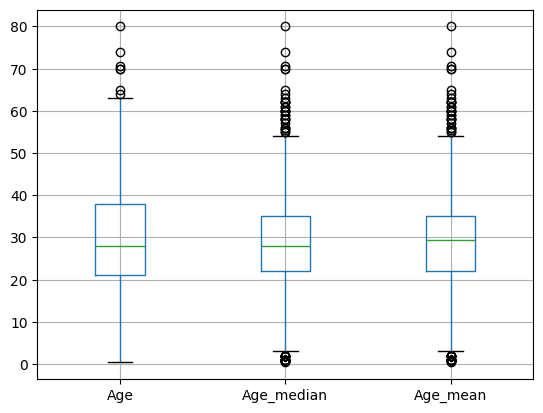

In [21]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

In [45]:
#Using Scikit-Learn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [28]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [29]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.28905604])

In [31]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [32]:
X_train

array([[ 40.    ,  27.7208,   0.    ,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   1.    ,   3.    ],
       [ 47.    ,   9.    ,   0.    ,   0.    ,   1.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ,   0.    ,   1.    ],
       [ 28.75  , 221.7792,   0.    ,   0.    ,   1.    ],
       [ 28.75  ,  25.925 ,   0.    ,   0.    ,   1.    ]], shape=(712, 5))

### Arbitrary Value Imputation

In [38]:
X_train = pd.DataFrame(X_train, columns=df.drop('Survived', axis=1).columns)


In [39]:
#Using Pandas

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)



In [41]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original Age variable variance:  161.98956633460548
Age Variance after 99 imputation:  161.98956633460548
Age Variance after -1 imputation:  161.98956633460548


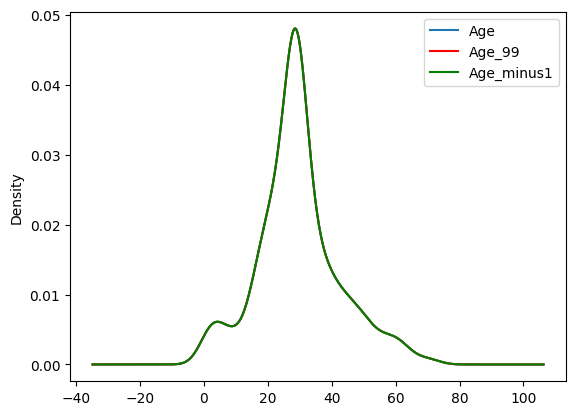

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [43]:
X_train.cov()

,Age,SibSp,Parch,Fare,Family,Age_99,Age_minus1
Age,161.989566,58.986531,-3.311738,-1.800826,-5.112563,161.989566,161.989566
SibSp,58.986531,2368.246832,8.567003,8.280261,16.847264,58.986531,58.986531
Parch,-3.311738,8.567003,1.267996,0.379281,1.647276,-3.311738,-3.311738
Fare,-1.800826,8.280261,0.379281,0.708695,1.087975,-1.800826,-1.800826
Family,-5.112563,16.847264,1.647276,1.087975,2.735252,-5.112563,-5.112563
Age_99,161.989566,58.986531,-3.311738,-1.800826,-5.112563,161.989566,161.989566
Age_minus1,161.989566,58.986531,-3.311738,-1.800826,-5.112563,161.989566,161.989566


In [44]:
X_train.corr()

,Age,SibSp,Parch,Fare,Family,Age_99,Age_minus1
Age,1.000000,0.095235,-0.231075,-0.168073,-0.242883,1.000000,1.000000
SibSp,0.095235,1.000000,0.156335,0.202116,0.209323,0.095235,0.095235
Parch,-0.231075,0.156335,1.000000,0.400103,0.884523,-0.231075,-0.231075
Fare,-0.168073,0.202116,0.400103,1.000000,0.781431,-0.168073,-0.168073
Family,-0.242883,0.209323,0.884523,0.781431,1.000000,-0.242883,-0.242883
Age_99,1.000000,0.095235,-0.231075,-0.168073,-0.242883,1.000000,1.000000
Age_minus1,1.000000,0.095235,-0.231075,-0.168073,-0.242883,1.000000,1.000000


In [46]:
#Using Scikit-Learn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [48]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [49]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [50]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [51]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [52]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   1.    ,   3.    ],
       [ 47.    ,   9.    ,   0.    ,   0.    ,   1.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ,   0.    ,   1.    ],
       [ 99.    , 221.7792,   0.    ,   0.    ,   1.    ],
       [ 99.    ,  25.925 ,   0.    ,   0.    ,   1.    ]], shape=(712, 5))